In [1]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
gas=GaussianNB()
ber=BernoulliNB()
from xgboost import XGBClassifier
xgbc=XGBClassifier()

In [2]:
#!pip install xgboost

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df1=pd.read_csv('ttrain.csv')

In [5]:
df2=pd.read_csv('ttest.csv')

In [6]:
df1.shape

(891, 12)

In [7]:
df2.shape

(418, 11)

In [8]:
df=df1.append(df2)

C:\Users\bilal\AppData\Local\Temp\ipykernel_18364\2456558213.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [11]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [12]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [13]:
df.Embarked.value_counts(normalize=True)

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

In [14]:
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [15]:
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Dr','Major','Col','Sir','Rev','Jonkheer','Capt','Don'],'Mr')

In [16]:
df['Senior']=df['Age'].map(lambda s:1 if s>70 else 0)

In [17]:
df.groupby('Sex')['Age'].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Senior
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.004584
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.067573
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,0.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [19]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
Senior            0
dtype: int64

In [20]:
df['Age'].fillna(df.groupby('Title')['Age'].transform('median'),inplace=True)
df.groupby('Title')['Age'].transform('median')

0      30.0
1      35.5
2      22.0
3      35.5
4      30.0
       ... 
413    30.0
414    35.5
415    30.0
416    30.0
417     4.0
Name: Age, Length: 1309, dtype: float64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Title        1309 non-null   object 
 13  Senior       1309 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 153.4+ KB


In [22]:
del df['Cabin']

In [23]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [24]:
df['Family']=df['SibSp']+df['Parch']+1

In [25]:
df['Embarked'].fillna('s')

0      S
1      C
2      S
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 1309, dtype: object

<AxesSubplot:xlabel='Embarked', ylabel='count'>

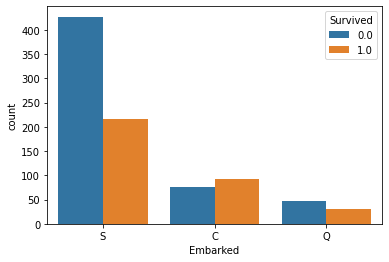

In [26]:
sns.countplot(x='Embarked',hue='Survived',data=df)

In [27]:
df.Family.value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family, dtype: int64

In [28]:
df['Single']=df.Family<2
df['Small']=(df.Family>1)&(df.Family<5)
df['Medium']=(df.Family>4)&(df.Family<7)
df['Large']=df.Family>6

In [29]:
df.drop(['PassengerId','Ticket'],axis=1,inplace=True)

In [30]:
df_dummies=pd.get_dummies(df,drop_first=True)

In [31]:
df_train=df_dummies[:891]
df_test=df_dummies[891:]

In [32]:
df_train.shape,df_test.shape

((891, 1324), (418, 1324))

In [33]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Single,Small,...,"Name_van Billiard, Master. James William","Name_van Billiard, Master. Walter John","Name_van Billiard, Mr. Austin Blyler","Name_van Melkebeke, Mr. Philemon",Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,0,2,False,True,...,0,0,0,0,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,0,2,False,True,...,0,0,0,0,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,0,1,True,False,...,0,0,0,0,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,0,2,False,True,...,0,0,0,0,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,0,1,True,False,...,0,0,0,0,1,0,1,0,1,0


In [34]:
del df_train['Survived']

In [35]:
y=df1['Survived']

In [36]:
algorithms=[gas,ber,k,log,gbc,r,d,xgbc]
names=['GaussianNB','BernoulliNB','KNearest','Logistic','GradientBoosting','RandomForest','Decision','XGBC']

In [37]:
def algo_test(X,y,algorithms=algorithms , names=names):
    for i in range(len(algorithms)):
        algorithms[i]=algorithms[i].fit(X, y)
    accuracy=[]
    precision=[]
    recall=[]
    f1=[]
    for i in range(len(algorithms)):
        accuracy.append(accuracy_score(y,algorithms[i].predict(X)))
        precision.append(precision_score(y,algorithms[i].predict(X)))
        recall.append(recall_score(y,algorithms[i].predict(X)))
        f1.append(f1_score(y,algorithms[i].predict(X)))
    metrics=pd.DataFrame(columns=['Accuracy','Precision','Recall','F1'],index=names)
    metrics['Accuracy']=accuracy
    metrics['Precision']=precision
    metrics['Recall']=recall
    metrics['F1']=f1
    return metrics.sort_values('F1',ascending=False)

In [38]:
algo_test(df_train,y)

C:\Users\bilal\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Accuracy,Precision,Recall,F1
RandomForest,1.000000,1.000000,1.000000,1.000000
Decision,1.000000,1.000000,1.000000,1.000000
GaussianNB,0.998878,0.997085,1.000000,0.998540
XGBC,0.965208,0.966967,0.941520,0.954074
Logistic,0.841751,0.813084,0.763158,0.787330
GradientBoosting,0.841751,0.825243,0.745614,0.783410
KNearest,0.818182,0.788462,0.719298,0.752294
BernoulliNB,0.810325,0.758209,0.742690,0.750369


In [39]:
del df_test['Survived']

In [40]:
tahmin=d.predict(df_test)

In [41]:
tahmin

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [42]:
df_test.head(418)

,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Single,Small,Medium,...,"Name_van Billiard, Master. James William","Name_van Billiard, Master. Walter John","Name_van Billiard, Mr. Austin Blyler","Name_van Melkebeke, Mr. Philemon",Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,3,34.5,0,0,7.8292,0,1,True,False,False,...,0,0,0,0,1,1,0,0,1,0
1,3,47.0,1,0,7.0000,0,2,False,True,False,...,0,0,0,0,0,0,1,0,0,1
2,2,62.0,0,0,9.6875,0,1,True,False,False,...,0,0,0,0,1,1,0,0,1,0
3,3,27.0,0,0,8.6625,0,1,True,False,False,...,0,0,0,0,1,0,1,0,1,0
4,3,22.0,1,1,12.2875,0,3,False,True,False,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,30.0,0,0,8.0500,0,1,True,False,False,...,0,0,0,0,1,0,1,0,1,0
414,1,39.0,0,0,108.9000,0,1,True,False,False,...,0,0,0,0,0,0,0,0,0,1
415,3,38.5,0,0,7.2500,0,1,True,False,False,...,0,0,0,0,1,0,1,0,1,0
416,3,30.0,0,0,8.0500,0,1,True,False,False,...,0,0,0,0,1,0,1,0,1,0


In [43]:
sonuc=df2[['PassengerId']]

In [44]:
sonuc['Survived']=tahmin

C:\Users\bilal\AppData\Local\Temp\ipykernel_18364\2725349856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc['Survived']=tahmin


In [45]:
sonuc.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [46]:
sonuc.to_csv('sonuc.csv',index=False)